In [1]:
import os
import sys

seed = 0
os.environ['PYTHONHASSEED'] = str(seed)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import random

from tensorflow.random import set_seed

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.models import load_model

In [3]:
# Add modules path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
from src.data_reader import DataReader
from src.dataset_exploration import unit_cycle_info
from src.metrics import compute_evaluation_metrics
from src.model_evaluation import evaluate_mlp, evaluate_mlp_multiple_splits
from src.plotting import plot_loss_curves, plot_rul, plot_rul_confidence_interval
from src.save_object import load_object

In [5]:
# Set seed
random.seed(seed)
np.random.seed(seed)
set_seed(seed)

In [6]:
# Set input and output paths
filename = '../data/N-CMAPSS_DS02-006.h5'
output_path = '../results/experiment_set_15'

if not os.path.exists(output_path):
    os.makedirs(output_path)

In [7]:
data_reader = DataReader()

start_time = time.process_time()  
data_reader.load_dataset(filename, load_train=True, load_test=True)
print("Operation time (sec): " , (time.process_time() - start_time))

if data_reader.train_set is not None:
    print("Train set shape: " + str(data_reader.train_set.shape))
    
if data_reader.test_set is not None:   
    print("Test set shape: " + str(data_reader.test_set.shape))

Operation time (sec):  3.390625
Train set shape: (5263447, 47)
Test set shape: (1253743, 47)


In [8]:
train_set = data_reader.train_set
test_set = data_reader.test_set

In [9]:
y_test = test_set['RUL']
x_test = test_set.drop(['RUL'], axis=1)

selected_columns = data_reader.column_names.w_cols + data_reader.column_names.x_s_cols
x_test = x_test[selected_columns]

x_test = x_test.astype(np.float32)
y_test = y_test.astype(np.float32)

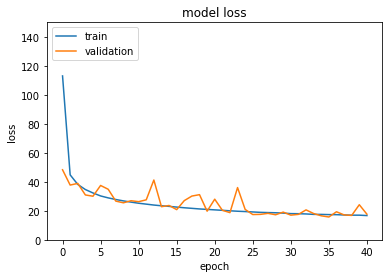

Test set:
MSE: 68.15
RMSE: 8.26
CMAPSS score: 1.84



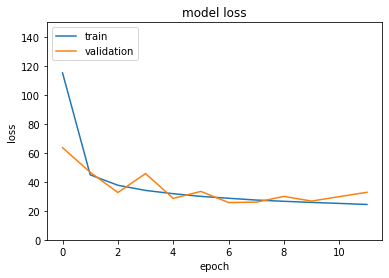

Test set:
MSE: 57.54
RMSE: 7.59
CMAPSS score: 1.74



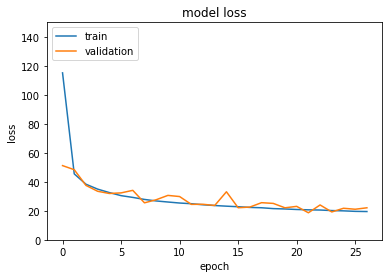

Test set:
MSE: 69.95
RMSE: 8.36
CMAPSS score: 1.85

MSE: mean = 65.21   stddev = 5.47
RMSE: mean = 8.07   stddev = 0.34
CMAPSS: mean = 1.81   stddev = 0.05


In [13]:
NUM_TRIALS = 3
TRAIN_RESULTS_PATH = r"../results/experiment_set_15/results_no_filtering_final/"

results = evaluate_mlp_multiple_splits(x_test, y_test, NUM_TRIALS, TRAIN_RESULTS_PATH, plot_loss=True)

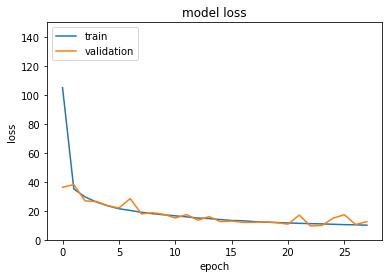

Test set:
MSE: 81.90
RMSE: 9.05
CMAPSS score: 2.06



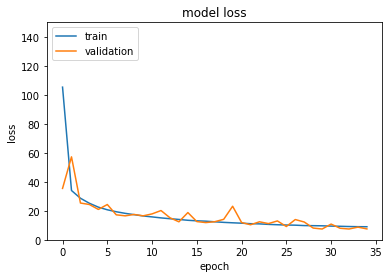

Test set:
MSE: 83.53
RMSE: 9.14
CMAPSS score: 2.08



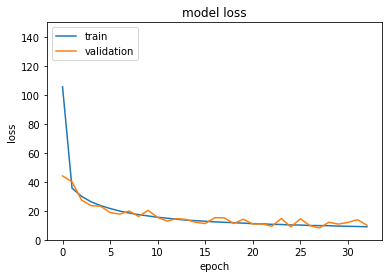

Test set:
MSE: 81.74
RMSE: 9.04
CMAPSS score: 2.06

MSE: mean = 82.39   stddev = 0.81
RMSE: mean = 9.08   stddev = 0.04
CMAPSS: mean = 2.06   stddev = 0.01


In [14]:
NUM_TRIALS = 3
TRAIN_RESULTS_PATH = r"../results/experiment_set_15/results_filtered_final/"

results = evaluate_mlp_multiple_splits(x_test, y_test, NUM_TRIALS, TRAIN_RESULTS_PATH, plot_loss=True)

In [13]:
test_set_single_unit = test_set[test_set['unit'] == 11]
test_set_single_unit = test_set_single_unit.astype(np.float32)

selected_columns = data_reader.column_names.w_cols + data_reader.column_names.x_s_cols
x_test = test_set_single_unit[selected_columns]
y_test = test_set_single_unit['RUL']

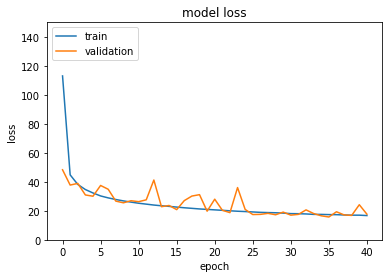

Test set:
MSE: 100.88
RMSE: 10.04
CMAPSS score: 2.09



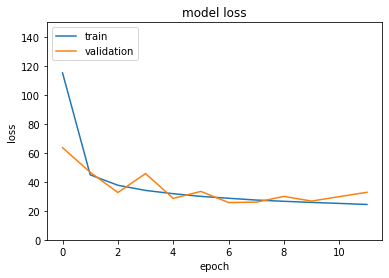

Test set:
MSE: 81.36
RMSE: 9.02
CMAPSS score: 1.92



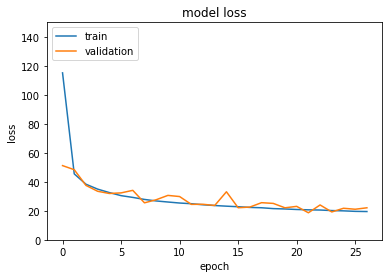

Test set:
MSE: 100.91
RMSE: 10.05
CMAPSS score: 2.10

MSE: mean = 94.38   stddev = 9.21
RMSE: mean = 9.70   stddev = 0.48
CMAPSS: mean = 2.04   stddev = 0.08


In [14]:
NUM_TRIALS = 3
TRAIN_RESULTS_PATH = r"../results/experiment_set_15/results_no_filtering_final"

results = evaluate_mlp_multiple_splits(x_test, y_test, NUM_TRIALS, TRAIN_RESULTS_PATH, 
                                       plot_loss=True)

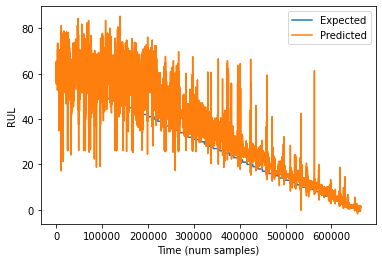

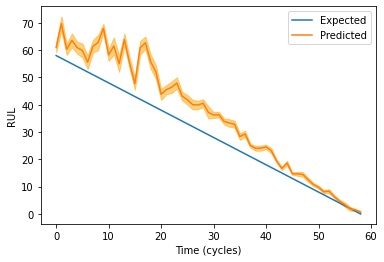

In [15]:
predicted_rul_mean = np.array(results.prediction_vals).mean(axis=0)
predicted_rul_std = np.array(results.prediction_vals).std(axis=0)

rul_eval_dict = {'cycle': test_set_single_unit['cycle'],
                'actual_RUL': test_set_single_unit['RUL'],
                'predicted_RUL_mean': predicted_rul_mean,
                'predicted_RUL_std': predicted_rul_std}
rul_eval = pd.DataFrame(rul_eval_dict)

rul_eval_mean = rul_eval.groupby('cycle').mean()

plot_rul(test_set_single_unit['RUL'], predicted_rul_mean)
plot_rul_confidence_interval(rul_eval_mean)

In [16]:
y_test = test_set['RUL']
x_test = test_set.drop(['RUL'], axis=1)

selected_columns = data_reader.column_names.w_cols + data_reader.column_names.x_s_cols
x_test = x_test[selected_columns]

x_test = x_test.astype(np.float32)
y_test = y_test.astype(np.float32)

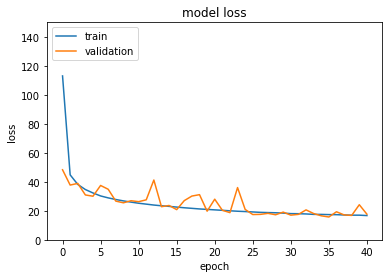

Test set:
MSE: 68.15
RMSE: 8.26
CMAPSS score: 1.84



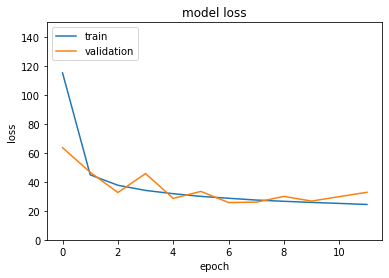

Test set:
MSE: 57.54
RMSE: 7.59
CMAPSS score: 1.74



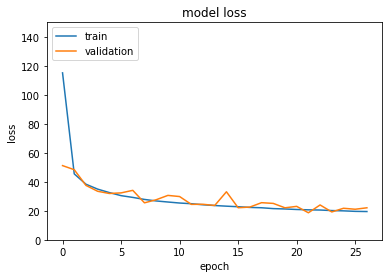

Test set:
MSE: 69.95
RMSE: 8.36
CMAPSS score: 1.85

MSE: mean = 65.21   stddev = 5.47
RMSE: mean = 8.07   stddev = 0.34
CMAPSS: mean = 1.81   stddev = 0.05


In [17]:
NUM_TRIALS = 3
TRAIN_RESULTS_PATH = r"../results/experiment_set_15/results_no_filtering_final"

results = evaluate_mlp_multiple_splits(x_test, y_test, NUM_TRIALS, TRAIN_RESULTS_PATH, 
                                       plot_loss=True)

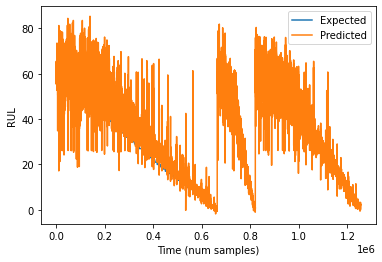

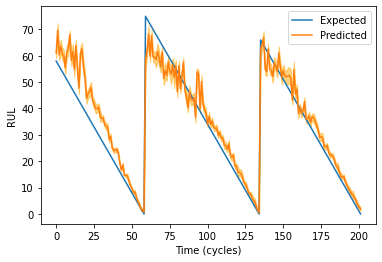

In [18]:
predicted_rul_mean = np.array(results.prediction_vals).mean(axis=0)
predicted_rul_std = np.array(results.prediction_vals).std(axis=0)

rul_eval_dict = {'unit': test_set['unit'],
                'cycle': test_set['cycle'],
                'actual_RUL': test_set['RUL'],
                'predicted_RUL_mean': predicted_rul_mean,
                'predicted_RUL_std': predicted_rul_std}
rul_eval = pd.DataFrame(rul_eval_dict)

rul_eval_mean = rul_eval.groupby(['unit', 'cycle']).mean()

plot_rul(test_set_single_unit['RUL'], predicted_rul_mean)
plot_rul_confidence_interval(rul_eval_mean)